In [45]:
import numpy
import matplotlib.pyplot as plt
import sympy
varx=sympy.Symbol("x",real=True)
varx

x

In [96]:
def derivada(r:float,t:float)->float:
    return 6*t-3*r
derivada(1,1)

3

In [52]:
def rungekutta(h:float,x:numpy.array)->numpy.array:
    y=numpy.zeros(x.size)
    y[0]=1
    for i in range(0,x.size-1):
        k1=derivada(y[i],x[i])
        k2=derivada(y[i]+(k1*h/2),x[i]+(h/2))
        k3=derivada(y[i]+(k2*h/2),x[i]+(h/2))
        k4=derivada(y[i]+(k3*h),x[i]+h)
        y[i+1]=y[i]+((k1+(2*k2)+(2*k3)+k4)*h/6)
    return y

In [49]:
def lagrange(x:numpy.array)->list:
    prod=1
    for k in x:
        prod*=varx-k
    salida=[]
    for k in x:
        val=prod/(varx-k)
        lamb=sympy.lambdify(varx,val,"numpy")
        salida.append(val/lamb(k))
    return salida
lagrange([1,2,3,4])

[-(x - 4)*(x - 3)*(x - 2)/6,
 (x - 4)*(x - 3)*(x - 1)/2,
 -(x - 4)*(x - 2)*(x - 1)/2,
 (x - 3)*(x - 2)*(x - 1)/6]

In [67]:
def cuadratura(f:sympy.core.mul.Mul,grado:int,minn:float,maxx:float)->float:
    n=int((grado)/2+1)
    puntos, pesos=numpy.polynomial.legendre.leggauss(n)
    lamb=sympy.lambdify(varx,f,"numpy")
    delta=(maxx-minn)/2
    prom=(maxx+minn)/2
    return delta*numpy.sum(pesos*lamb((delta*puntos)+prom))
cuadratura(5*varx**5-18*varx**4+varx**3/2-3*varx**2+varx-7,5,-5,7)
    

12946.799999999992

In [88]:
def adams(t0,h,tf,orden):
    t=numpy.arange(t0,tf,h)
    t4=t[:orden]
    y=numpy.zeros_like(t)
    prima=numpy.zeros_like(t)
    y4=rungekutta(h,t4)
    for i in range(0,orden):
        y[i]=y4[i]
        prima[i]=derivada(y4[i],t[i])
    for i in range(0,t.size-orden):
        #bashford
        valores=t[i:i+orden]
        polinomios=lagrange(valores)
        cuadraturas=[]
        for j in polinomios:
            cuadraturas.append(cuadratura(j,orden,t[i+orden-1],t[i+orden]))
        cuadraturas=numpy.array(cuadraturas)
        y[i+orden]=y[i+orden-1]+numpy.sum(cuadraturas*prima[i:i+orden])
        prima[i+orden]=derivada(y[i+orden],t[i+orden])
        #moulton
        valores=t[i:i+orden+1]
        polinomios=lagrange(valores)
        cuadraturas=[]
        for j in polinomios:
            cuadraturas.append(cuadratura(j,orden+1,t[i+orden-1],t[i+orden]))
        cuadraturas=numpy.array(cuadraturas)
        y[i+orden]=y[i+orden-1]+numpy.sum(cuadraturas*prima[i:i+orden+1])
        prima[i+orden]=derivada(y[i+orden],t[i+orden])
    return y

In [103]:
def adams4(t,h):
    t4=t[:5]
    y=numpy.zeros_like(t)
    prima=numpy.zeros_like(t)
    y4=rungekutta(h,t4)
    for i in range(0,5):
        y[i]=y4[i]
        prima[i]=derivada(y4[i],t[i])
    for i in range(0,t.size-5):
        #bashford
        y[i+5]=y[i+4]+(h*((1901*prima[i+4])-(2774*prima[i+3])+(2616*prima[i+2])-(1274*prima[i+1])+(251*prima[i]))/720)
        prima[i+5]=derivada(y[i+5],t[i+5])
        #moulton
        y[i+4]=y[i+3]+(h*((251*prima[i+4])+(646*prima[i+3])-(264*prima[i+2])+(106*prima[i+1])-(19*prima[i]))/720)
        prima[i+4]=derivada(y[i+4],t[i+4])
    return y

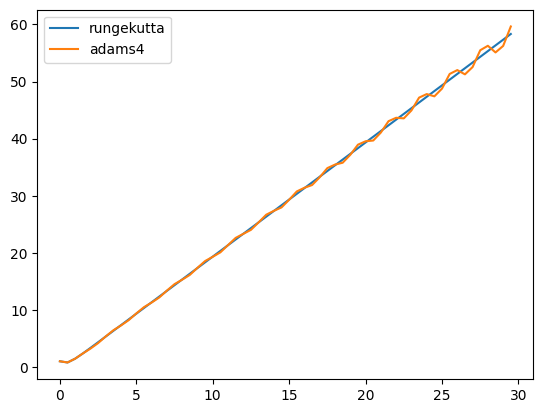

In [108]:
t=numpy.arange(0,30,0.5)
yk=rungekutta(t[1],t)
#y=adams(0,0.5,30,5)
y4=adams4(0,0.5,30)
plt.plot(t,yk,label="rungekutta")
#plt.plot(t,y,label="adams")
plt.plot(t,y4,label="adams4")
plt.legend()